No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


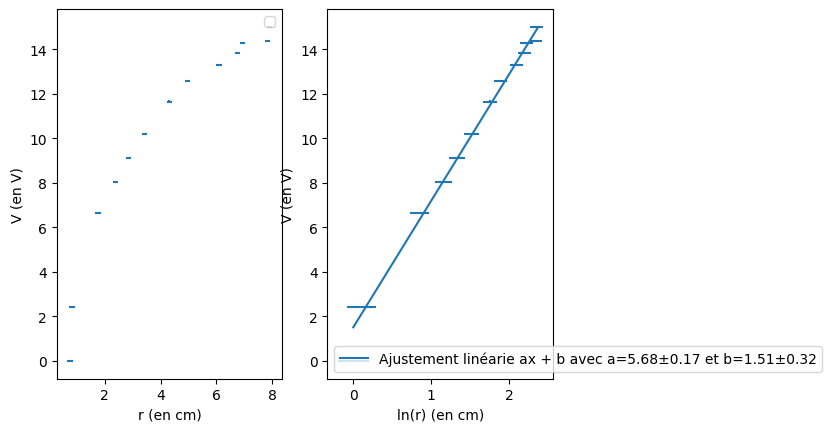

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

R_1=0.75
R_1_incer=0.05
R_2=8
R_2_incer=0.05


def f1(r_ln_over_R1,C,V_0):
    return C*r_ln_over_R1+V_0

V = np.array([0, 2.43, 6.65, 8.054, 9.115, 10.187, 11.656, 12.590, 13.300, 13.846, 14.300, 14.366, 15.007])
V_incer = 0.05


r = np.array([0.75, 0.83, 1.76, 2.38, 2.85, 3.43, 4.32, 4.96, 6.09, 6.76, 6.94, 7.84, 7.90])
r_incer = 0.1

r_log_over_R_1 = np.log(r/R_1)
r_log_incer = r_incer / r + 1 / R_1 * R_1_incer

param ,pcov = curve_fit(f1,r_log_over_R_1, V, sigma = r_log_incer)
(C_exp, V_0_exp) = (param[0], param[1])
incer_exp = np.sqrt(np.diag(pcov))
(C_exp_incer, V_0_exp_incer) = (incer_exp[0], incer_exp[1])

r__log_ajust = np.log(np.linspace(R_1,R_2,200)/R_1)


fig=plt.figure()
plt.rcParams['figure.figsize']=[15,10]
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.errorbar(r,V,yerr=V_incer,xerr=r_incer,fmt='None')


ax2.errorbar(r_log_over_R_1,V,yerr=V_incer,xerr=r_log_incer,fmt='None')
ax2.plot(r__log_ajust,f1(r__log_ajust,C_exp,V_0_exp),label=f"Ajustement linéarie ax + b avec a={C_exp:.2f}±{C_exp_incer:.2f} et b={V_0_exp:.2f}±{V_0_exp_incer:.2f}")


ax1.set_ylabel("V (en V)")
ax1.set_xlabel("r (en cm)")
ax1.legend()

ax2.set_ylabel("V (en V)")
ax2.set_xlabel("ln(r) (en cm)")
ax2.legend()

plt.show()






In [7]:
data={'V(V)':V,'deltaV(V)':V_incer,'r(cm)':r,'deltar(cm)':r_incer}
df=pd.DataFrame(data=data)
with open("Tableau.txt","w") as f:
    f.write(df.to_latex(column_format='|c|c|',index=False,columns=['V(V)','r(cm)']))

C:\Users\flore\AppData\Local\Temp\ipykernel_12680\3885101898.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df.to_latex(column_format='|c|c|',index=False,columns=['V(V)','r(cm)']))


In [ ]:
df2=pd.read_csv(".csv")
V2=(df['V'].values)